# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [29]:
import pandas as pd
import numpy as np
pd.read_csv("lumber-prices.csv")
df = pd.read_csv("lumber-prices.csv")
df.head()

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00


## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [30]:
df.date
pd.to_datetime(df.date, errors="coerce", format='%Y-%m-%d')
df.date = pd.to_datetime(df.date, errors="coerce", format='%Y-%m-%d')
df.date


0     1996-12-09
1     1997-01-02
2     1997-02-03
3     1997-03-03
4     1997-04-01
         ...    
295   2021-07-01
296   2021-08-02
297   2021-09-01
298   2021-10-01
299   2021-11-01
Name: date, Length: 300, dtype: datetime64[ns]

In [31]:
df.date.value_counts().sort_index().tail(1)

2021-11-01    1
Name: date, dtype: int64

## What 3 months had the lowest low lumber price?

In [32]:
df.head()
df.low.sort_values()
df.groupby(by='date').low.min().sort_values().tail(3)

date
2021-06-01    $705.00
2021-03-01    $826.30
2021-02-01    $842.90
Name: low, dtype: object

## What is the median "high" lumber price in our dataset?

In [39]:
df.high
# df['high'] = df['high'].str.replace('$',"")
# df.high

df['high'] = df['high'].astype(float)
df.high

df.high.median()

329.65

## Plot the maximum "high" lumber price on an annual basis.

<AxesSubplot:xlabel='date'>

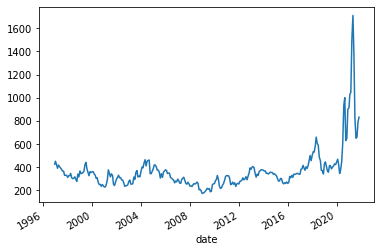

In [42]:
df.groupby(by='date').high.max().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [45]:
df.low
# df['low'] = df['low'].str.replace('$',"")
# df.low

df['low'] = df['low'].astype(float)
df.high

0      424.7
1      450.5
2      421.5
3      389.7
4      417.5
       ...  
295    825.6
296    650.0
297    659.7
298    789.6
299    831.8
Name: high, Length: 300, dtype: float64

In [50]:
df['difference'] = df.high - df.low
df.difference
df.head()

,open,high,low,close,date,difference
0,$407.00,424.7,377.0,$424.70,1996-12-09,47.7
1,$426.00,450.5,395.0,$411.40,1997-01-02,55.5
2,$408.50,421.5,382.1,$383.50,1997-02-03,39.4
3,$386.00,389.7,355.0,$380.50,1997-03-03,34.7
4,$378.00,417.5,376.5,$403.10,1997-04-01,41.0


In [55]:
#df.groupby(by='date').low.min().sort_values().tail(3)

df.groupby(by='date').difference.max().sort_values().tail(1)

date
2021-06-01    675.0
Name: difference, dtype: float64

## How many months did lumber prices drop in?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [57]:
#df.date.dt.month.value_counts().sort_index()
df.head()
#coming back to this 

,open,high,low,close,date,difference
0,$407.00,424.7,377.0,$424.70,1996-12-09,47.7
1,$426.00,450.5,395.0,$411.40,1997-01-02,55.5
2,$408.50,421.5,382.1,$383.50,1997-02-03,39.4
3,$386.00,389.7,355.0,$380.50,1997-03-03,34.7
4,$378.00,417.5,376.5,$403.10,1997-04-01,41.0


## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [65]:
df.high.value_counts().sort_index()

171.8     1
175.9     1
179.8     1
187.0     1
189.1     1
         ..
1030.4    1
1045.0    1
1380.0    1
1502.3    1
1711.2    1
Name: high, Length: 277, dtype: int64

In [66]:
df.date.dt.year.value_counts()
df.resample('Y', on='date').size()
#coming back to this


date
1996-12-31     1
1997-12-31    12
1998-12-31    12
1999-12-31    12
2000-12-31    12
2001-12-31    12
2002-12-31    12
2003-12-31    12
2004-12-31    12
2005-12-31    12
2006-12-31    12
2007-12-31    12
2008-12-31    12
2009-12-31    12
2010-12-31    12
2011-12-31    12
2012-12-31    12
2013-12-31    12
2014-12-31    12
2015-12-31    12
2016-12-31    12
2017-12-31    12
2018-12-31    12
2019-12-31    12
2020-12-31    12
2021-12-31    11
Freq: A-DEC, dtype: int64